In [2]:

import numpy as np  
import pandas as pd  
  
import matplotlib.pyplot as plt  
import seaborn as sns  
 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor  
 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
  
from sklearn.preprocessing import StandardScaler  


In [3]:
df = pd.read_csv("C:/Users/Muhammad Mitkar/Desktop/OIBSIP/advertise/Advertising.csv")  
df.head()  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:

print(df.isnull().sum()) 

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [5]:
 
df.drop(columns=["Unnamed: 0"], inplace=True)  

 
print(df.head())  


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


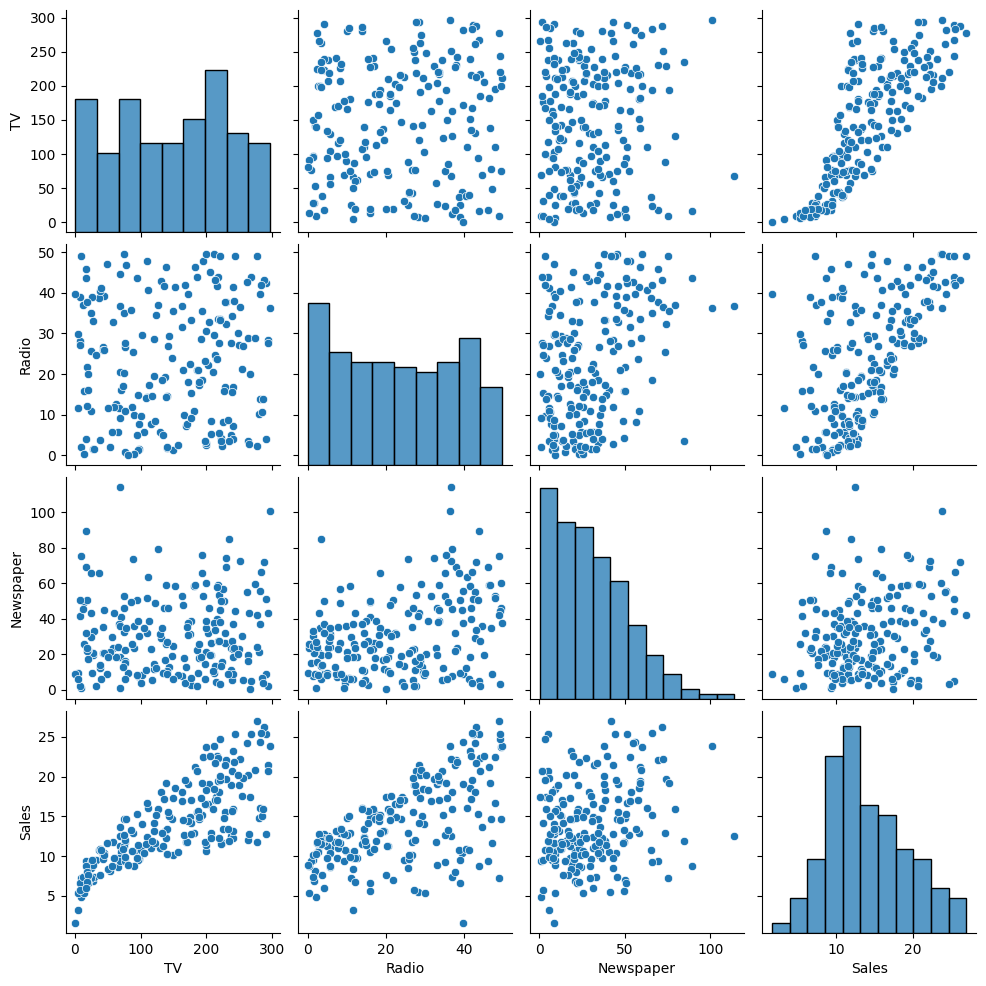

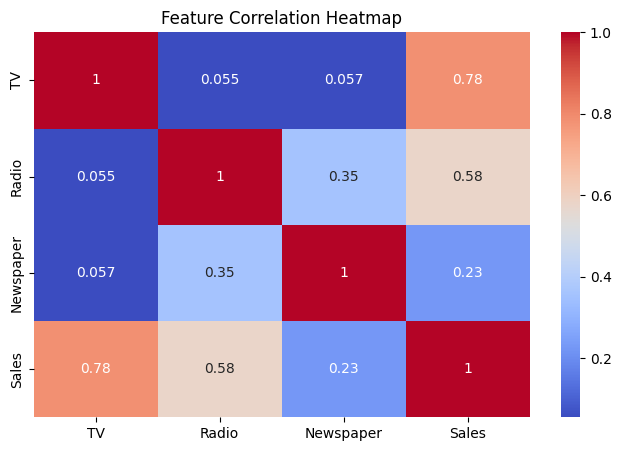

In [6]:
sns.pairplot(df)  
plt.show()  

# Correlation heatmap  
plt.figure(figsize=(8,5))  
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  
plt.title("Feature Correlation Heatmap")  
plt.show()  

In [7]:
 
X = df[["TV", "Radio", "Newspaper"]]  
y = df["Sales"]  

 
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [8]:
from sklearn.linear_model import LinearRegression  

# Initialize the model  
model = LinearRegression()  

# Train the model  
model.fit(X_train, y_train)  

# Get model coefficients  
print("Coefficients:", model.coef_)  
print("Intercept:", model.intercept_)  


Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629


In [9]:
 
y_pred = model.predict(X_test)  


results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})  
print(results.head())  


     Actual  Predicted
95     16.9  16.408024
15     22.4  20.889882
30     21.4  21.553843
158     7.3  10.608503
128    24.7  22.112373


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  


mae = mean_absolute_error(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Manually take the square root 
r2 = r2_score(y_test, y_pred)  


print("Mean Absolute Error (MAE):", mae)  
print("Mean Squared Error (MSE):", mse)  
print("Root Mean Squared Error (RMSE):", rmse)  
print("R-squared Score (R²):", r2)  


Mean Absolute Error (MAE): 1.4607567168117603
Mean Squared Error (MSE): 3.1740973539761033
Root Mean Squared Error (RMSE): 1.78159966153345
R-squared Score (R²): 0.899438024100912


In [11]:
from sklearn.ensemble import RandomForestRegressor  
  
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  

rf_model.fit(X_train, y_train)  


y_pred_rf = rf_model.predict(X_test)  


r2_rf = r2_score(y_test, y_pred_rf)  
print("Random Forest R² Score:", r2_rf)  


Random Forest R² Score: 0.9812843792541843
